## Observations and Insights 

In [2]:
# Matplotlib Pymaceuticals Homework
# Written by Jason Gabunilas

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = study_data["Mouse ID"].unique()
print(f"This dataset contains {len(num_mice)} unique mice.")


This dataset contains 249 unique mice.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 




In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Group the mice by Mouse ID and then perform a value_counts on timepoint to create a series of timepoint counts for each mouse.
timepoints_counts = study_data.groupby("Mouse ID")["Timepoint"].value_counts()
# Each mouse should only have one of each timepoint. Determine all of the muce that have more than one of the timepoints and return in a pandas series that describes the counts of timepoints for each mouse. Retrieve the indices of that series
dupes = timepoints_counts[timepoints_counts > 1].index
# Dupes will be a multi-index type with both Mouse ID and Timepoint. Drop the Timepoint index, and remove any duplicate mouse IDs so that you are left with an index object of unique mice
dupes = dupes.droplevel("Timepoint").unique()


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Set the dataframe index as mouse ID so that rows can be removed by Mouse ID
study_data.set_index("Mouse ID", inplace = True)

# Loop over the dupes index object and drop the rows corresponding to all the mice in that Series
for mouse in dupes:
    study_data.drop(mouse, inplace = True)

    

In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = study_data.index.unique()
print(f"This cleaned dataset contains {len(num_mice_clean)} unique mice.")

This cleaned dataset contains 248 unique mice.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Create the group_by_regimen variable and use it to create dataframes for the mean, median, variance, standard deviation, and SEM by drug regimen
group_by_regimen = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_by_regimen = group_by_regimen.mean()
median_by_regimen = group_by_regimen.median()
var_by_regimen = group_by_regimen.var()
stdev_by_regimen = group_by_regimen.std()
SEM_by_regimen = group_by_regimen.sem()

# Combine into a dataframe
summary_stats_df = pd.DataFrame({"Mean" : mean_by_regimen, "Median" : median_by_regimen, "Variance" : var_by_regimen, "Standard Deviation" : stdev_by_regimen, "SEM" : SEM_by_regimen})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats_df2 = group_by_regimen.agg([np.mean, np.median, np.var, np.std, st.sem])
# Rename the Columns
summary_stats_df2 = summary_stats_df2.rename(columns={"mean" : "Mean", "median" : "Median", "var" : "Variance", "sem" : "SEM", "std" : "Standard Deviation"})
# Reorganize the Columns
summary_stats_df2 = summary_stats_df2[["Mean", "Median", "Variance", "Standard Deviation", "SEM"]]
summary_stats_df2

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Reset the index so that we can once again use groupby on mouse ID
study_data = study_data.reset_index()
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


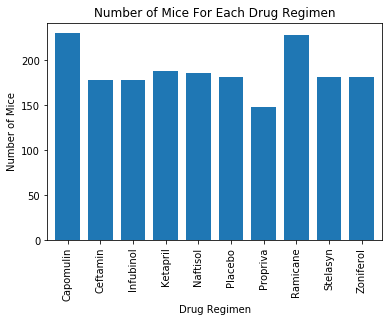

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Group the study_data dataframe by Drug Regimen, then perform a .nunique() count on the Mouse ID column to count the number of mice in each Drug Regimen
total_mice_by_treatment = study_data.groupby("Drug Regimen")["Mouse ID"].nunique()
# Initialize an empty list by which to build a list of drugs used. Then loop over each index of the total_mice_by_treatment series and store the name of the index (i.e. drug name) into the list. The list will be used as the xticks labels for pyplot.
treatment_regimen = []
for treatment in total_mice_by_treatment.index:
    treatment_regimen.append(treatment)

# Build a dataframe using the total_mice_by_treatment series so that we can plot it using .plot() method in pandas
mice_treatment_df = pd.DataFrame({"Number of Mice" : total_mice_by_treatment})
# print(mice_treatment_df)

# Create the plot from the dataframe and create the axis labels
mice_treatment_pandas_plot = mice_treatment_df.plot(kind = 'bar', title = "Number of Mice For Each Drug Regimen", legend = False, width = 0.75)
mice_treatment_pandas_plot.set_ylabel("Number of Mice")

## Below is the code for each timepoint throughout the study
total_mice_by_treatment2 = study_data.groupby("Drug Regimen")["Mouse ID"].count()
print(total_mice_by_treatment2)
mice_treatment_pandas_plot2 = total_mice_by_treatment2.plot(kind = "bar", title = "Number of Mice For Each Drug Regimen", legend = False, width = 0.75)


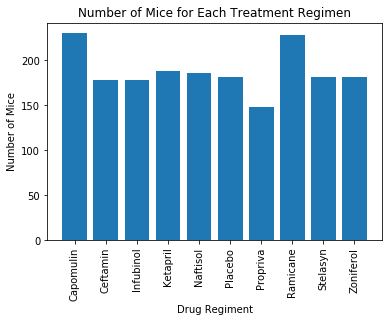

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Re-create the plot using pyplot commands

# x_axis = np.arange(len(total_mice_by_treatment))
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, treatment_regimen, rotation = 90)
# plt.title("Number of Mice for Each Treatment Regimen")
# plt.xlabel("Drug Regiment")
# plt.ylabel("Number of Mice")
# plt.bar(x_axis, total_mice_by_treatment)


## Below is the code for each timepoint throughout the study
x_axis = np.arange(len(total_mice_by_treatment2))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatment_regimen, rotation = 90)
plt.title("Number of Mice for Each Treatment Regimen")
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Mice")
plt.bar(x_axis, total_mice_by_treatment2)
plt.show()

Text(0, 0.5, '')

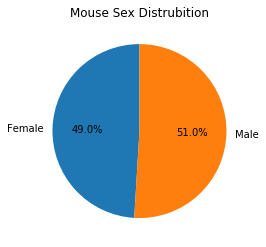

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = study_data.groupby("Sex")["Mouse ID"].count()
gender_plot_pandas = gender_data.plot(kind = 'pie', title = "Mouse Sex Distrubition", autopct="%1.1f%%", startangle = 90)
gender_plot_pandas.set_ylabel("")

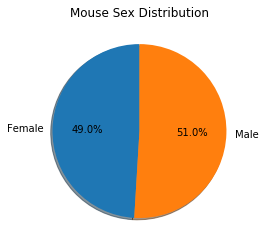

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot_pyplot = plt.pie(gender_data,
        autopct="%1.1f%%", shadow=True, startangle=90, labels = gender_data.index)
plt.title('Mouse Sex Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse. 
last_timepoint = study_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Join the last_timepoint series onto the original dataframe on Mouse ID and Timepoint, making sure to use the inner join so that only the final timepoints are included.
last_timepoint_df = study_data.merge(last_timepoint, on = ["Mouse ID", "Timepoint"], how = 'inner')
last_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
top_four = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_capomulin = []
final_tumor_vol_ramicane = []
final_tumor_vol_infibunol = []
final_tumor_vol_ceftamin = []

# Loop over each treatment in the list of top four treatments. For each treatment, create a series for the final tumor volumes by subsetting the last_timepoint_df by that treatment, then return the tumor volume column and add it to the final tumor volume list for that treatment.
for treatment in top_four:
    final_tumor_volumes = last_timepoint_df[last_timepoint_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    if treatment == 'Capomulin':
        final_tumor_vol_capomulin = final_tumor_volumes
    elif treatment == 'Ramicane':
        final_tumor_vol_ramicane = final_tumor_volumes
    elif treatment == "Infubinol":
        final_tumor_vol_infubinol = final_tumor_volumes
    elif treatment == "Ceftamin":
        final_tumor_vol_ceftamin = final_tumor_volumes
        
# print(final_tumor_vol_capomulin)
# print(final_tumor_vol_ramicane)
# print(final_tumor_vol_infubinol)
# print(final_tumor_vol_ceftamin)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine outliers using upper and lower bounds

capomulin_IQR = np.quantile(final_tumor_vol_capomulin, 0.75) -np.quantile(final_tumor_vol_capomulin, 0.25)
capomulin_lower = np.quantile(final_tumor_vol_capomulin, 0.25) -capomulin_IQR*1.5
capomulin_upper = np.quantile(final_tumor_vol_capomulin, 0.75) +capomulin_IQR*1.5
# print(capomulin_lower)
# print(capomulin_upper)
for value in final_tumor_vol_capomulin:
    if value > capomulin_upper or value < capomulin_lower:     
        print("fTumor volume {value:.2f}mm3 with Capomulin treatment is an outlier.")
        break

ramicane_IQR = np.quantile(final_tumor_vol_ramicane, 0.75) -np.quantile(final_tumor_vol_ramicane, 0.25)
ramicane_lower = np.quantile(final_tumor_vol_ramicane, 0.25) -ramicane_IQR*1.5
ramicane_upper = np.quantile(final_tumor_vol_ramicane, 0.75) +ramicane_IQR*1.5
# print(ramicane_lower)
# print(ramicane_upper)
for value in final_tumor_vol_ramicane:
    if value > ramicane_upper or value < ramicane_lower:     
        print(f"Tumor volume {value:.2f}mm3 with Ramicane treatment is an outlier.")
        break

infubinol_IQR = np.quantile(final_tumor_vol_infubinol, 0.75) -np.quantile(final_tumor_vol_infubinol, 0.25)
infubinol_lower = np.quantile(final_tumor_vol_infubinol, 0.25) -infubinol_IQR*1.5
infubinol_upper = np.quantile(final_tumor_vol_infubinol, 0.75) + infubinol_IQR*1.5
# print(infubinol_lower)
# print(infubinol_upper)
for value in final_tumor_vol_infubinol:
    if value > infubinol_upper or value < infubinol_lower:     
        print(f"Tumor volume {value:.2f}mm3 with Infubinol treatment is an outlier.")
        break

    
ceftamin_IQR = np.quantile(final_tumor_vol_ceftamin, 0.75) -np.quantile(final_tumor_vol_ceftamin, 0.25)
ceftamin_lower = np.quantile(final_tumor_vol_ceftamin, 0.25) -ceftamin_IQR*1.5
ceftamin_upper = np.quantile(final_tumor_vol_ceftamin, 0.75) + ceftamin_IQR*1.5
# print(ceftamin_lower)
# print(ceftamin_upper)
for value in final_tumor_vol_ceftamin:
    if value > ceftamin_upper or value < ceftamin_lower:     
        print(f"Tumor volume {value:.2f}mm3 with Ceftamin treatment is an outlier.")
        break

    
    
    

Tumor volume 36.32mm3 with Infubinol treatment is an outlier.


Text(0, 0.5, 'Final Tumor Volumes (mm3)')

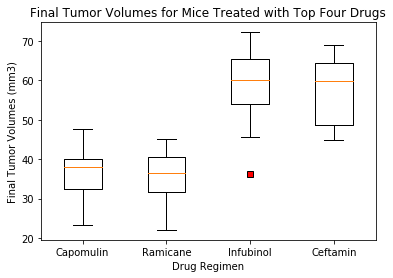

In [17]:
# Generate a box plot of the final tumorfinal_tumor_vol_ramicane volume of each mouse across four regimens of interest
plt.boxplot([final_tumor_vol_capomulin, final_tumor_vol_ramicane, final_tumor_vol_infubinol, final_tumor_vol_ceftamin], flierprops = dict(markerfacecolor='r', marker='s'))


plt.title('Final Tumor Volumes for Mice Treated with Top Four Drugs')

plt.xticks([position + 1 for position in range(len(top_four))], top_four)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volumes (mm3)')


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

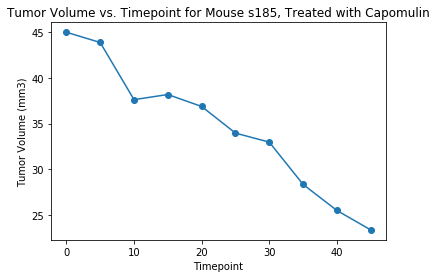

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_s185 = study_data.loc[study_data["Mouse ID"] == 's185']
mouse_s185_plot = plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"], marker = "o")
plt.title('Tumor Volume vs. Timepoint for Mouse s185, Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Tumor Volume (mm3)')

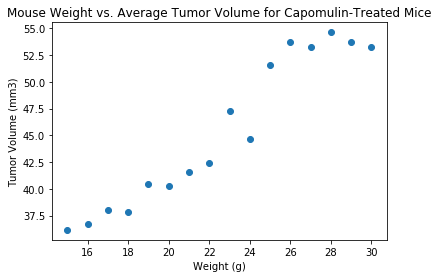

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Group the study data by weight and calculate the average tumor volume for each weight
tumor_data = study_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

weight = tumor_data.index
tumor_vol = tumor_data
capomulin_weight_tumor_scatter = plt.scatter(weight, tumor_vol)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin-Treated Mice')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

The Pearson correlation coefficient for mouse weight and average tumor volume is 0.962.


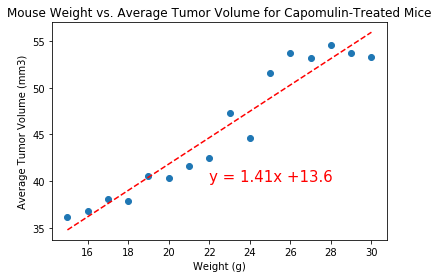

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corrcoeff = st.pearsonr(weight, tumor_vol)
print(f"The Pearson correlation coefficient for mouse weight and average tumor volume is {corrcoeff[0]:.3f}.")

# Perform the linear regression calculations. Note that the weight and tumor_vol data structures are Pandas series.
weight_tumor_slope, weight_tumor_yint, weight_tumor_r, weight_tumor_pval, weight_tumor_stderr = st.linregress(weight, tumor_vol)
weight_tumor_fit = weight_tumor_slope * weight + weight_tumor_yint

capomulin_weight_tumor_scatter = plt.scatter(weight, tumor_vol)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin-Treated Mice')
plt.plot(weight,weight_tumor_fit,"--", color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
line_eq = 'y = ' + str(round(weight_tumor_slope, 2)) + 'x +' + str(round(weight_tumor_yint, 2))
plt.annotate(line_eq,(22, 40),fontsize=15,color="red")
plt.show()